# Run gradient boosted model on the dataframe produced in data_per_window_for_boosting

In [1]:
import xarray as xr
import numpy as np
import scipy.interpolate as interp
import pandas as pd

import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt

In [2]:
statmodel_df = pd.read_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_statmodel_main03.csv')
statmodel_df.columns[50:]

Index(['surfslope_w11', 'width_mean0', 'width_mean1', 'width_mean2',
       'width_mean3', 'width_mean4', 'width_mean5', 'width_mean6',
       'width_mean7', 'width_mean8', 'width_mean9', 'width_mean10',
       'width_mean11', 'ELA_mean0', 'ELA_mean1', 'ELA_mean2', 'ELA_mean3',
       'ELA_mean4', 'ELA_mean5', 'ELA_mean6', 'ELA_mean7', 'ELA_mean8',
       'ELA_mean9', 'ELA_mean10', 'ELA_mean11', 'CMB_mean0', 'CMB_mean1',
       'CMB_mean2', 'CMB_mean3', 'CMB_mean4', 'CMB_mean5', 'CMB_mean6',
       'CMB_mean7', 'CMB_mean8', 'CMB_mean9', 'CMB_mean10', 'CMB_mean11',
       'beta0', 'beta1', 'beta2', 'beta3', 'beta4', 'beta5', 'beta6', 'beta7',
       'beta8', 'beta9', 'beta10', 'beta11', 'Z_min0', 'Z_min1', 'Z_min2',
       'Z_min3', 'Z_min4', 'Z_min5', 'Z_min6', 'Z_min7', 'Z_min8', 'Z_min9',
       'Z_min10', 'Z_min11', 'Z_max0', 'Z_max1', 'Z_max2', 'Z_max3', 'Z_max4',
       'Z_max5', 'Z_max6', 'Z_max7', 'Z_max8', 'Z_max9', 'Z_max10', 'Z_max11',
       'Z_mean0', 'Z_mean1', 'Z_mean2', 

In [3]:
columns_for_modeling = ['surge_reduced', 'thick_w0', 'thick_w1', 'thick_w2',
       'thick_w3', 'thick_w4', 'thick_w5', 'thick_w6', 'thick_w7', 'thick_w8',
       'thick_w9', 'thick_w10', 'thick_w11', 'windowlength_w0',
       'windowlength_w1', 'windowlength_w2', 'windowlength_w3',
       'windowlength_w4', 'windowlength_w5', 'windowlength_w6',
       'windowlength_w7', 'windowlength_w8', 'windowlength_w9',
       'windowlength_w10', 'windowlength_w11', 'bedslope_w0', 'bedslope_w1',
       'bedslope_w2', 'bedslope_w3', 'bedslope_w4', 'bedslope_w5',
       'bedslope_w6', 'bedslope_w7', 'bedslope_w8', 'bedslope_w9',
       'bedslope_w10', 'bedslope_w11', 'surfslope_w0', 'surfslope_w1',
       'surfslope_w2', 'surfslope_w3', 'surfslope_w4', 'surfslope_w5',
       'surfslope_w6', 'surfslope_w7', 'surfslope_w8', 'surfslope_w9',
       'surfslope_w10', 'surfslope_w11', 'width_mean0', 'width_mean1', 'width_mean2',
       'width_mean3', 'width_mean4', 'width_mean5', 'width_mean6',
       'width_mean7', 'width_mean8', 'width_mean9', 'width_mean10',
       'width_mean11',
       'Z_min0', 'Z_min1', 'Z_min2',
       'Z_min3', 'Z_min4', 'Z_min5', 'Z_min6', 'Z_min7', 'Z_min8', 'Z_min9',
       'Z_min10', 'Z_min11', 'Z_max0', 'Z_max1', 'Z_max2', 'Z_max3', 'Z_max4',
       'Z_max5', 'Z_max6', 'Z_max7', 'Z_max8', 'Z_max9', 'Z_max10', 'Z_max11',
       'Z_mean0', 'Z_mean1', 'Z_mean2', 'Z_mean3', 'Z_mean4', 'Z_mean5',
       'Z_mean6', 'Z_mean7', 'Z_mean8', 'Z_mean9', 'Z_mean10', 'Z_mean11'
                       ]

In [4]:
import xgboost
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split


In [5]:
x_train, x_test, y_train, y_test = train_test_split(statmodel_df[columns_for_modeling[1:]], statmodel_df[columns_for_modeling[0]], random_state=42)

In [6]:
x_train

,thick_w0,thick_w1,thick_w2,thick_w3,thick_w4,thick_w5,thick_w6,thick_w7,thick_w8,thick_w9,...,Z_mean2,Z_mean3,Z_mean4,Z_mean5,Z_mean6,Z_mean7,Z_mean8,Z_mean9,Z_mean10,Z_mean11
417,18.868204,31.126586,46.280982,63.071700,75.939625,76.605675,68.540695,69.064695,78.008247,66.235715,...,668.428571,578.357143,519.000000,464.928571,383.500000,299.857143,242.785714,179.400000,94.666667,NaN
296,570.099115,541.251425,511.733550,490.620580,451.767030,413.501760,358.206060,286.950285,296.776120,248.225590,...,702.163181,657.793836,607.688825,546.284572,472.290556,387.082811,294.370711,179.969557,77.787344,NaN
678,55.525194,54.192930,59.089891,61.491187,55.950272,62.821383,65.912323,61.439396,68.674488,56.239563,...,922.400000,878.545455,812.500000,725.545455,665.300000,607.545455,538.300000,472.363636,410.000000,NaN
486,146.019740,163.517430,149.417030,129.832810,103.693190,77.536720,60.533725,50.414070,49.071499,28.721762,...,445.610155,433.325481,420.928576,401.592551,357.438890,259.520654,182.309607,132.223538,NaN,NaN
60,26.140601,31.858531,24.450927,26.685692,28.864418,32.927512,34.998660,31.692145,30.373854,29.860478,...,552.500000,490.625000,441.000000,407.875000,379.000000,349.250000,318.625000,280.444444,251.800000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,18.818810,19.090474,35.453104,72.858070,122.462385,122.615945,90.181605,80.056022,66.972012,43.966818,...,497.111111,443.250000,384.888889,362.111111,337.000000,299.333333,238.500000,173.888889,122.000000,NaN
106,NaN,22.876510,26.151598,21.080495,16.766883,18.476153,15.791723,12.014020,13.040630,14.884468,...,838.845546,733.985385,647.829845,580.394045,507.332573,436.623527,383.648257,340.714285,282.107610,NaN
270,85.220010,132.138310,149.326210,279.299050,334.759720,279.655435,240.067955,212.207405,182.284115,116.952932,...,562.421533,514.357336,456.148540,365.790557,291.835640,232.429300,193.567729,115.502907,42.685086,NaN
435,52.523070,47.245558,39.439661,45.760629,51.062012,54.285946,54.432985,53.010729,42.498203,22.455099,...,1035.673255,930.508846,874.652599,775.194938,729.880714,679.739413,620.362044,542.091672,467.405052,NaN


In [7]:
dmatrix_train = xgboost.DMatrix(x_train, label=y_train)
dmatrix_test = xgboost.DMatrix(x_test, label=y_test)

In [8]:
params = {'objective':'reg:logistic', 'num_boost_round':20000, 'max_depth':1, 'scale_pos_weight':0.3}

xgb = xgboost.train(params, dmatrix_train, num_boost_round=20000)

[17:43:42] WARNING: ../src/learner.cc:541: 
Parameters: { num_boost_round } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [9]:
predictions = xgb.predict(dmatrix_test)

In [10]:
pwd

'/home/colili/Documents/PhD/project_john/Code/boosted_model'

In [11]:
pd.DataFrame({'true':y_test, 'predictions':predictions}).to_csv('/home/colili/Documents/PhD/project_john/DataFrame_produced/df_data_roc_main.csv')

In [12]:
# predictions.to_csv('bed-el-basic.csv', index=False)

In [13]:
y_test

66     1
316    0
658    0
797    0
398    0
      ..
691    0
328    0
430    0
204    0
586    0
Name: surge_reduced, Length: 213, dtype: int64

Text(0.6, 0.0, 'AUC = 0.7')

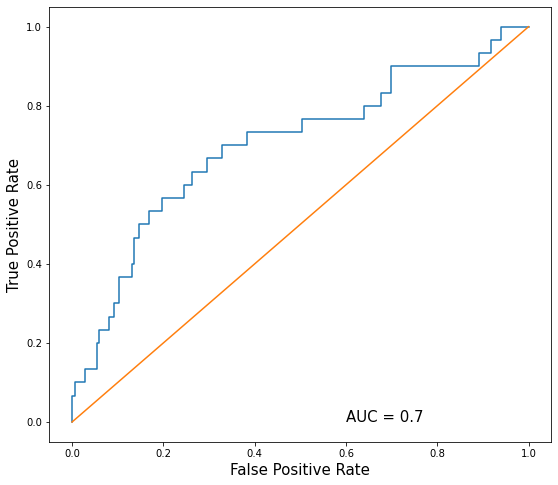

In [14]:
fpr, tpr, t = metrics.roc_curve(y_true=y_test, y_score=predictions)

fig, ax = plt.subplots(figsize=(9, 8))

ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1])

ax.set_ylabel('True Positive Rate', fontsize=15)
ax.set_xlabel('False Positive Rate', fontsize=15)
ax.text(
s = 'AUC = ' + str(round(metrics.roc_auc_score(y_true=y_test, y_score=predictions),2))
    , x=0.6, y=0.0, fontsize=15
)

(array([188.,   2.,   5.,   3.,   4.,   1.,   1.,   3.,   0.,   6.]),
 array([9.9631059e-08, 9.9962339e-02, 1.9992457e-01, 2.9988682e-01,
        3.9984906e-01, 4.9981129e-01, 5.9977353e-01, 6.9973576e-01,
        7.9969800e-01, 8.9966023e-01, 9.9962246e-01], dtype=float32),
 <a list of 10 Patch objects>)

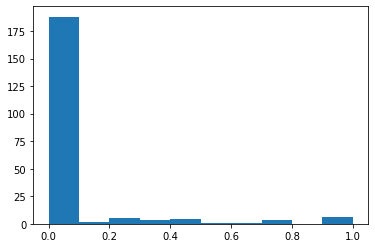

In [15]:
plt.hist(predictions)

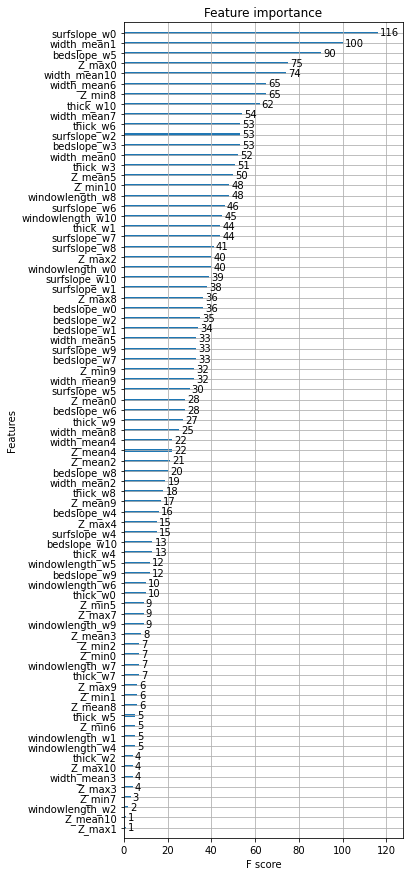

In [16]:
fig, ax = plt.subplots(figsize=(5, 15))
xgboost.plot_importance(xgb, ax=ax)